## Global optimization

Global optimization aims to find the global minimum of a function within given bounds, in the presence of potentially many local minima. Typically, global minimizers efficiently search the parameter space, while using a local minimizer (e.g., minimize) under the hood. SciPy contains a number of good global optimizers. Here, we’ll use those on the same objective function, namely the (aptly named) eggholder function:

$$ f(x_0, x_1) = -(x_1 + 47) sin\left( \sqrt{\left|\frac{x_0}{2}+(x_1 + 47)\right|}\right) - x_0 sin\left( \sqrt{\left|\frac{x_0}{2}-(x_1 + 47)\right|}\right)$$

#### Define the EggHolder function

In [2]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

#### Plot the EggHolder function

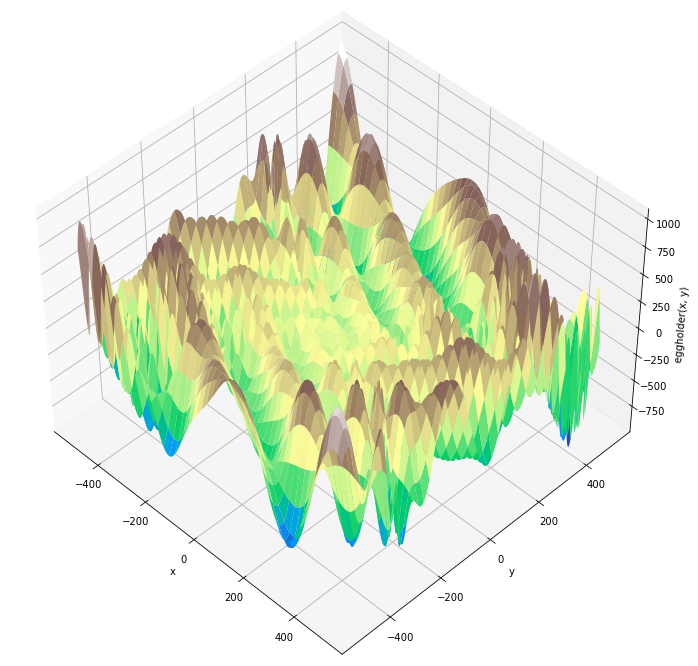

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)

xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()


We now use the global optimizers to obtain the minimum and the function value at the minimum. We’ll store the results in a dictionary so we can compare different optimization results later.

In [4]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])

## Simplicial homology Global Optimization

Global optimization using **simplicial homology global optimization**
[1]. Appropriate for solving general purpose NLP and blackbox optimization problems to global optimality (low-dimensional problems).

In general, the optimization problems are of the form:
<div class="math notranslate nohighlight">
\begin{eqnarray*} 
                    \min & f(x) &\\
                    \text{subject to: } & g_i(x) \geq 0, & i = 1, 2, ..., m & \\
                                        & h_i(x) = 0, & j = 1, 2, ..., p & \\
\end{eqnarray*}
wehre $x \in \mathbb{R}^n$, $f: \mathbb{R}^n \rightarrow \mathbb{R}$, $g: \mathbb{R}^n \rightarrow \mathbb{R}^m$, $h: \mathbb{R}^n\rightarrow \mathbb{R}^p$, 
</div>


where $x$ is a vector of one or more variables. $f(x)$ is the objective function $R^n \rightarrow R$, $g_i(x)$ are the inequality constraints, and $h_j(x)$ are the equality constraints.

Optionally, the lower and upper bounds for each element in x can also be specified using the bounds argument.

While most of the theoretical advantages of SHGO are only proven for when $f(x)$ is a Lipschitz smooth function, the algorithm is also proven to converge to the global optimum for the more general case where $f(x)$ is non-continuous, non-convex and non-smooth, if the default sampling method is used [1].

The local search method may be specified using the minimizer_kwargs parameter which is passed on to scipy.optimize.minimize. By default, the SLSQP method is used. In general, it is recommended to use the SLSQP or COBYLA local minimization if inequality constraints are defined for the problem since the other methods do not use constraints.

The sobol method points are generated using the Sobol (1967) [2] sequence. The primitive polynomials and various sets of initial direction numbers for generating Sobol sequences is provided by [3] by Frances Kuo and Stephen Joe. The original program sobol.cc (MIT) is available and described at https://web.maths.unsw.edu.au/~fkuo/sobol/ translated to Python 3 by Carl Sandrock 2016-03-31.


[1] Endres, SC, Sandrock, C, Focke, WW (2018) “A simplicial homology algorithm for lipschitz optimisation”, Journal of Global Optimization.

## Dual Annealing optimization

This function implements the Dual Annealing optimization. This stochastic approach derived from [3] combines the generalization of CSA (Classical Simulated Annealing) and FSA (Fast Simulated Annealing) [1] [2] coupled to a strategy for applying a local search on accepted locations [4]. An alternative implementation of this same algorithm is described in [5] and benchmarks are presented in [6]. This approach introduces an advanced method to refine the solution found by the generalized annealing process. This algorithm uses a distorted Cauchy-Lorentz visiting distribution, with its shape controlled by the parameter 
<div class="math notranslate nohighlight">
\[g_{q_{v}}(\Delta x(t)) \propto \frac{ \
\left[T_{q_{v}}(t) \right]^{-\frac{D}{3-q_{v}}}}{ \
\left[{1+(q_{v}-1)\frac{(\Delta x(t))^{2}} { \
\left[T_{q_{v}}(t)\right]^{\frac{2}{3-q_{v}}}}}\right]^{ \
\frac{1}{q_{v}-1}+\frac{D-1}{2}}}\]</div>
Where $t$ is the artificial time. This visiting distribution is used to generate a trial jump distance $\Delta x(t)$ of variable $x(t)$ under artificial temperature $T_{q_{v}}(t)$ .

From the starting point, after calling the visiting distribution function, the acceptance probability is computed as follows:
<div class="math notranslate nohighlight">
\[p_{q_{a}} = \min{\{1,\left[1-(1-q_{a}) \beta \Delta E \right]^{ \
\frac{1}{1-q_{a}}}\}}\]</div>
Where  is a acceptance parameter. For , zero acceptance probability is assigned to the cases where
<div class="math notranslate nohighlight">
\[[1-(1-q_{a}) \beta \Delta E] &lt; 0\]</div>
<p>The artificial temperature <span class="math notranslate nohighlight">\(T_{q_{v}}(t)\)</span> is decreased according to</p>
<div class="math notranslate nohighlight">
\[T_{q_{v}}(t) = T_{q_{v}}(1) \frac{2^{q_{v}-1}-1}{\left( \
1 + t\right)^{q_{v}-1}-1}\]</div>

Where $q_{v}$ is the visiting parameter.

``New in version 1.2.0.``

In [5]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -956.9182316246595
 message: ['Maximum number of iteration reached']
    nfev: 4076
    nhev: 0
     nit: 1000
    njev: 25
  status: 0
 success: True
       x: array([482.35331089, 432.87899986])

All optimizers return an OptimizeResult, which in addition to the solution contains information on the number of function evaluations, whether the optimization was successful, and more. For brevity, we won’t show the full output of the other optimizers:

## Differential Evolution

Differential Evolution is stochastic in nature (does not use gradient methods) to find the minimum, and can search large areas of candidate space, but often requires larger numbers of function evaluations than conventional gradient-based techniques.

The algorithm is due to Storn and Price [1].
Differential evolution is a stochastic population based method that is useful for global optimization problems. At each pass through the population the algorithm mutates each candidate solution by mixing with other candidate solutions to create a trial candidate. There are several strategies [2] for creating trial candidates, which suit some problems more than others. The ‘best1bin’ strategy is a good starting point for many systems. In this strategy two members of the population are randomly chosen. Their difference is used to mutate the best member (the ‘best’ in ‘best1bin’), $b_0$ , so far:
<div class="math notranslate nohighlight">
\[b' = b_0 + mutation * (population[rand0] - population[rand1])\]</div>

A trial vector is then constructed. Starting with a randomly chosen ith parameter the trial is sequentially filled (in modulo) with parameters from b' or the original candidate. The choice of whether to use b' or the original candidate is made with a binomial distribution (the ‘bin’ in ‘best1bin’) - a random number in $[0, 1)$ is generated. If this number is less than the recombination constant then the parameter is loaded from b', otherwise it is loaded from the original candidate. The final parameter is always loaded from b'. Once the trial candidate is built its fitness is assessed. If the trial is better than the original candidate then it takes its place. If it is also better than the best overall candidate it also replaces that. To improve your chances of finding a global minimum use higher popsize values, with higher mutation and (dithering), but lower recombination values. This has the effect of widening the search radius, but slowing convergence. By default the best solution vector is updated continuously within a single iteration ``(updating='immediate')``. This is a modification [4] of the original differential evolution algorithm which can lead to faster convergence as trial vectors can immediately benefit from improved solutions. To use the original Storn and Price behaviour, updating the best solution once per iteration, set updating='deferred'.

``New in version 0.15.0.``


<p class="rubric">References</p>

1. Storn, R and Price, K, Differential Evolution - a Simple and Efficient Heuristic for Global Optimization over Continuous Spaces, Journal of Global Optimization, 1997, 11, 341 - 359.

2. <a class="reference external" href="http://www1.icsi.berkeley.edu/~storn/code.html">http://www1.icsi.berkeley.edu/~storn/code.html</a></p>

3. <a class="reference external" href="http://en.wikipedia.org/wiki/Differential_evolution">http://en.wikipedia.org/wiki/Differential_evolution</a>
    
4. </span><span class="fn-backref">(<a href="#id2">1. </a>,<a href="#id5">2. </a>) Wormington, M., Panaccione, C., Matney, K. M., Bowen, D. K., - Characterization of structures from X-ray scattering data using genetic algorithms, Phil. Trans. R. Soc. Lond. A, 1999, 357, 2827-2848

5. Lampinen, J., A constraint handling approach for the differential evolution algorithm. Proceedings of the 2002 Congress on Evolutionary Computation. CEC’02 (Cat. No. 02TH8600). Vol. 2. IEEE, 2002.

## Basin-hopping

Basin-hopping is a two-phase method that combines a global stepping algorithm with local minimization at each step. Designed to mimic the natural process of energy minimization of clusters of atoms, it works well for similar problems with “funnel-like, but rugged” energy landscapes [5].

As the step-taking, step acceptance, and minimization methods are all customizable, this function can also be used to implement other two-phase methods.

#### Notes

Basin-hopping is a stochastic algorithm which attempts to find the global minimum of a smooth scalar function of one or more variables [1] [2] [3] [4]. The algorithm in its current form was described by David Wales and Jonathan Doye [2] http://www-wales.ch.cam.ac.uk/.

The algorithm is iterative with each cycle composed of the following features

1. random perturbation of the coordinates
2. local minimization
3. accept or reject the new coordinates based on the minimized function value

The acceptance test used here is the Metropolis criterion of standard Monte Carlo algorithms, although there are many other possibilities [3].

This global minimization method has been shown to be extremely efficient for a wide variety of problems in physics and chemistry. It is particularly useful when the function has many minima separated by large barriers. See the Cambridge Cluster Database http://www-wales.ch.cam.ac.uk/CCD.html for databases of molecular systems that have been optimized primarily using basin-hopping. This database includes minimization problems exceeding 300 degrees of freedom.

See the free software program GMIN (http://www-wales.ch.cam.ac.uk/GMIN) for a Fortran implementation of basin-hopping. This implementation has many different variations of the procedure described above, including more advanced step taking algorithms and alternate acceptance criterion.

For stochastic global optimization there is no way to determine if the true global minimum has actually been found. Instead, as a consistency check, the algorithm can be run from a number of different random starting points to ensure the lowest minimum found in each example has converged to the global minimum. For this reason, basinhopping will by default simply run for the number of iterations niter and return the lowest minimum found. It is left to the user to ensure that this is in fact the global minimum.

Choosing stepsize: This is a crucial parameter in basinhopping and depends on the problem being solved. The step is chosen uniformly in the region from x0-stepsize to x0+stepsize, in each dimension. Ideally, it should be comparable to the typical separation (in argument values) between local minima of the function being optimized. basinhopping will, by default, adjust stepsize to find an optimal value, but this may take many iterations. You will get quicker results if you set a sensible initial value for stepsize.

Choosing T: The parameter T is the “temperature” used in the Metropolis criterion. Basinhopping steps are always accepted if func(xnew) < func(xold). Otherwise, they are accepted with probability:

``exp( -(func(xnew) - func(xold)) / T )``

So, for best results, T should to be comparable to the typical difference (in function values) between local minima. (The height of “walls” between local minima is irrelevant.)

If T is 0, the algorithm becomes Monotonic Basin-Hopping, in which all steps that increase energy are rejected.

``New in version 0.12.0.``

#### References
1. Wales, David J. 2003, Energy Landscapes, Cambridge University Press, Cambridge, UK.
2. (1,2) Wales, D J, and Doye J P K, Global Optimization by Basin-Hopping and the Lowest Energy Structures of Lennard-Jones Clusters Containing up to 110 Atoms. Journal of Physical Chemistry A, 1997, 101, 5111.

3. (1,2) Li, Z. and Scheraga, H. A., Monte Carlo-minimization approach to the multiple-minima problem in protein folding, Proc. Natl. Acad. Sci. USA, 1987, 84, 6611.

4. Wales, D. J. and Scheraga, H. A., Global optimization of clusters, crystals, and biomolecules, Science, 1999, 285, 1368.

5. Olson, B., Hashmi, I., Molloy, K., and Shehu1, A., Basin Hopping as a General and Versatile Optimization Framework for the Characterization of Biological Macromolecules, Advances in Artificial Intelligence, Volume 2012 (2012), Article ID 674832, DOI:10.1155/2012/674832

In [6]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['BH'] = optimize.basinhopping(eggholder, bounds)

In [8]:
results['DE']

     fun: -956.9182316232569
     jac: array([ 0.00030695, -0.00032969])
 message: 'Optimization terminated successfully.'
    nfev: 1482
     nit: 47
 success: True
       x: array([482.35326757, 432.87894968])

In [9]:
results['BH']

                        fun: -565.9977809710114
 lowest_optimization_result:       fun: -565.9977809710114
 hess_inv: array([[ 8.81685275, -2.54103428,  0.        ,  0.        ],
       [-2.54103428,  3.87842963,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])
      jac: array([0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 35
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-105.87689047,  423.15323471, -514.23676391,  511.95467181])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4370
                        nit: 100
                       njev: 874
                          x: array([-105.87689047,  423.15323471, -514.23676391,  511.95467181])

**[shgo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo)** has a second method, which returns all local minima rather than only what it thinks is the global minimum:

In [9]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')

We’ll now plot all found minima on a heatmap of the function:

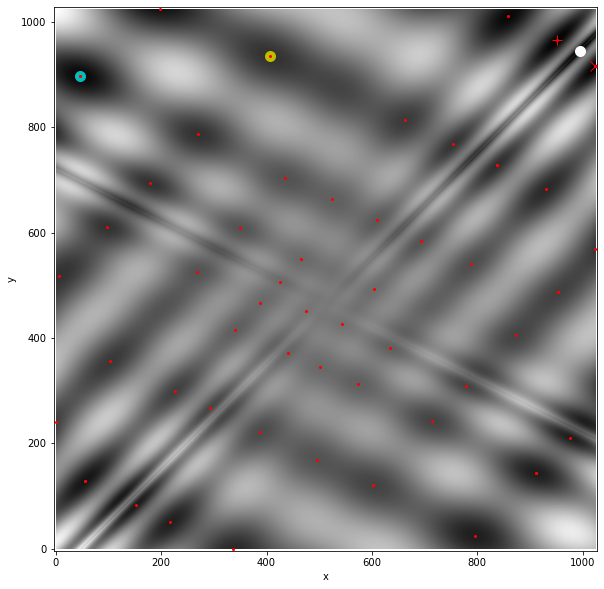

In [12]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()

## Least-squares minimization (least_squares)

SciPy is capable of solving robustified bound-constrained nonlinear least-squares problems:

<div class="math notranslate nohighlight">
\begin{align}
&\min_\mathbf{x} \quad \frac{1}{2} \sum_{i = 1}^m \rho\left(f_i(\mathbf{x})^2\right) \\
&\text{subject to } \quad \mathbf{lb} \leq \mathbf{x} \leq \mathbf{ub}
\end{align}</div>

Here $f_i(\mathbf{x})$ are smooth functions from $\mathbb{R}^n$ to $\mathbb{R}$ , we refer to them as residuals. The purpose of a scalar-valued function $\rho(\cdot)$ is to reduce the influence of outlier residuals and contribute to robustness of the solution, we refer to it as a loss function. A linear loss function gives a standard least-squares problem. Additionally, constraints in a form of lower and upper bounds on some of $x_j$ are allowed.

All methods specific to least-squares minimization utilize a $m \times n $  matrix of partial derivatives called Jacobian and defined as $J_{ij} = \partial f_i / \partial x_j$. It is highly recommended to compute this matrix analytically and pass it to [least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares), otherwise, it will be estimated by finite differences, which takes a lot of additional time and can be very inaccurate in hard cases.

Function [least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) can be used for fitting a function $\varphi(t; \mathbf{x})$ to empirical data $\{(t_i, y_i), i = 0, \ldots, m-1$. To do this, one should simply precompute residuals as $f_i(\mathbf{x}) = w_i (\varphi(t_i; \mathbf{x}) - y_i)$, where $w_i$ are weights assigned to each observation.

## Example of solving a fitting problem

Here we consider an enzymatic reaction 1. There are 11 residuals defined as
<div class="math notranslate nohighlight">
\[f_i(x) = \frac{x_0 (u_i^2 + u_i x_1)}{u_i^2 + u_i x_2 + x_3} - y_i, \quad i = 0, \ldots, 10,\]</div>

where $y_i$ are measurement values and $u_i$ are values of the independent variable. The unknown vector of parameters is $\mathbf{x} = (x_0, x_1, x_2, x_3)^T$. As was said previously, it is recommended to compute Jacobian matrix in a closed form:

<div class="math notranslate nohighlight">
 \begin{align}
 &J_{i0} = \frac{\partial f_i}{\partial x_0} = \frac{u_i^2 + u_i x_1}{u_i^2 + u_i x_2 + x_3} \\
 &J_{i1} = \frac{\partial f_i}{\partial x_1} = \frac{u_i x_0}{u_i^2 + u_i x_2 + x_3} \\
 &J_{i2} = \frac{\partial f_i}{\partial x_2} = -\frac{x_0 (u_i^2 + u_i x_1) u_i}{(u_i^2 + u_i x_2 + x_3)^2} \\
 &J_{i3} = \frac{\partial f_i}{\partial x_3} = -\frac{x_0 (u_i^2 + u_i x_1)}{(u_i^2 + u_i x_2 + x_3)^2}
 \end{align}</div>

We are going to use the “hard” starting point defined in 2. To find a physically meaningful solution, avoid potential division by zero and assure convergence to the global minimum we impose constraints $0 \leq x_j \leq 100, j = 0, 1, 2, 3$.

The code below implements least-squares estimation of $\mathbf{x}$ and finally plots the original data and the fitted model function:



In [13]:
from scipy.optimize import least_squares

def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model(x, u) - y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

In [14]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

res.x

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.


array([0.192806  , 0.19130332, 0.12306046, 0.13607205])

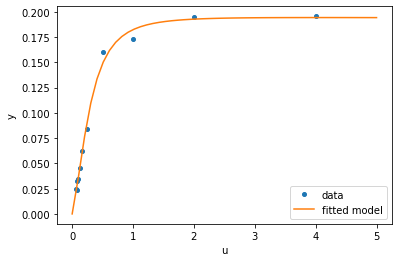

In [15]:
import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

**References:**

J. Kowalik and J. F. Morrison, “Analysis of kinetic data for allosteric enzyme reactions as a nonlinear regression problem”, Math. Biosci., vol. 2, pp. 57-66, 1968.

B. M. Averick et al., “The MINPACK-2 Test Problem Collection”.